# YOUTUBE VIDEOS DATA ANALYSIS

YouTube maintains a list of the top trending videos on the platform. This data set includes several months of data on daily trending YouTube videos. Data is included for the USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, India and Japan. This list is determined by using user interactions such as views, comments and likes to identify which videos are user preferred and displays them on the trending page. Ranking of these videos is done based on a ratio of views, likes, comments and shares, in order to display the best videos at the top of the page. We used the data sets available and began the process of data cleaning followed by Exploratory data analysis (EDA).

#### Our project was aimed at analyzing the daily YouTube trending videos data sets that are available here:

https://www.kaggle.com/datasnaek/youtube-new

### DATA CLEANING

import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/output/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/output


In [3]:
AllCSV = [i for i in glob.glob('*.{}'.format('csv'))]
#AllCSV = [i for i in glob.glob('*')]
AllCSV

['23.04.07_US_videos.csv',
 '23.04.07_GB_videos.csv',
 '23.04.07_IN_videos.csv',
 '23.04.07_DE_videos.csv',
 '23.04.07_CA_videos.csv',
 '23.04.07_FR_videos.csv',
 '23.04.07_KR_videos.csv',
 '23.04.07_RU_videos.csv',
 '23.04.07_JP_videos.csv',
 '23.04.07_BR_videos.csv',
 '23.04.07_MX_videos.csv']

In [4]:
all_dataframes = [] # list to store each data frame separately
for csv in AllCSV:
    df = pd.read_csv(csv, encoding='latin-1')
    df['country'] = csv[9:11] # adding column 'country' so that each dataset could be identified uniquely
    all_dataframes.append(df)
    print(csv)

23.04.07_US_videos.csv
23.04.07_GB_videos.csv
23.04.07_IN_videos.csv
23.04.07_DE_videos.csv
23.04.07_CA_videos.csv
23.04.07_FR_videos.csv
23.04.07_KR_videos.csv
23.04.07_RU_videos.csv
23.04.07_JP_videos.csv
23.04.07_BR_videos.csv
23.04.07_MX_videos.csv


In [5]:
all_dataframes[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,HwtyqN-ZCtQ,Visiting Aunt Cathy!,2023-07-03T19:25:30Z,UCoEmptob-eEGKk18c2VplJg,Kai Cenat,24,23.04.07,kai|cenat|visitng|aunt|cathy,938758,88068,0,3922,https://i.ytimg.com/vi/HwtyqN-ZCtQ/default.jpg,False,False,Make Sure You keep Up With All Of My Social Me...,US
1,6OUZ4hXzLIk,I COACHED THE MOST CHAOTIC AAU GAME OF THE YEAR!,2023-07-03T22:00:16Z,UCkNB_lQah9MLniBLlk97iBw,Cam Wilder,20,23.04.07,cam|wilder|aau|basketball|bball|ballislife|ove...,476983,59337,0,1640,https://i.ytimg.com/vi/6OUZ4hXzLIk/default.jpg,False,False,THE NY/NJ AAU SERIES IS HERE! 60K LIKES ON THI...,US
2,gYG6yEaDXJg,Brewstew - Fourth Of July,2023-07-03T19:33:03Z,UCepPGz8AVCbggMl3BvboaBA,brewstewfilms,23,23.04.07,brewstew|4th of july|fourth of july|fireworks|...,656541,50987,0,4509,https://i.ytimg.com/vi/gYG6yEaDXJg/default.jpg,False,False,Everybody please have a safe and happy Fourth ...,US
3,nsJGJHkJolI,Elephant Rifle Annihilates Ballistic Gel at 82...,2023-07-03T19:09:29Z,UCUK0HBIBWgM2c4vsPhkYY4w,The Slow Mo Guys,24,23.04.07,slomo|slow|mo|super|motion|Slow Motion|1000|10...,1029330,85719,0,4742,https://i.ytimg.com/vi/nsJGJHkJolI/default.jpg,False,False,Gav and Dan join Scott from @KentuckyBallistic...,US
4,BzEOlHU1MAs,Trixie Puts Brittany Broski in Drag (Again)!,2023-07-03T19:00:04Z,UC0biFgrMdkv1hFAFLVePODQ,Trixie Mattel,24,23.04.07,Trixie Mattel|Trixie Mattel Youtube|Trixie and...,494386,42964,0,1218,https://i.ytimg.com/vi/BzEOlHU1MAs/default.jpg,False,False,Trixie and @Brittany_Broski are together again...,US


In [6]:
all_dataframes[0].info() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelId          200 non-null    object
 4   channelTitle       200 non-null    object
 5   categoryId         200 non-null    int64 
 6   trending_date      200 non-null    object
 7   tags               200 non-null    object
 8   view_count         200 non-null    int64 
 9   likes              200 non-null    int64 
 10  dislikes           200 non-null    int64 
 11  comment_count      200 non-null    int64 
 12  thumbnail_link     200 non-null    object
 13  comments_disabled  200 non-null    bool  
 14  ratings_disabled   200 non-null    bool  
 15  description        199 non-null    object
 16  country            200 non-null    object
dt

In [7]:
# Checking shape of all dataframes
for df in all_dataframes:
    print(df.shape)

(200, 17)
(200, 17)
(191, 17)
(200, 17)
(200, 17)
(200, 17)
(200, 17)
(146, 17)
(200, 17)
(200, 17)
(200, 17)


In [8]:
all_dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelId          200 non-null    object
 4   channelTitle       200 non-null    object
 5   categoryId         200 non-null    int64 
 6   trending_date      200 non-null    object
 7   tags               200 non-null    object
 8   view_count         200 non-null    int64 
 9   likes              200 non-null    int64 
 10  dislikes           200 non-null    int64 
 11  comment_count      200 non-null    int64 
 12  thumbnail_link     200 non-null    object
 13  comments_disabled  200 non-null    bool  
 14  ratings_disabled   200 non-null    bool  
 15  description        199 non-null    object
 16  country            200 non-null    object
dt

### Fixing Data Types
First part of the data cleaning process was to fix the data types of all the columns in order to make them easier to manipulate and be more manageable. It should be noted that for several columns the data type was changed to strings, when the data types are displayed, they show up as objects as strings are a type of object in pandas.

In [9]:
# video_id
for df in all_dataframes:
    df['video_id'] = df['video_id'].astype('str')
print('Done')

Done


In [10]:
all_dataframes[1].head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,IobcFxBR9Wk,We're Having Another Baby!,2023-07-03T18:01:57Z,UCrUbqTCagwsaP2Fmr0p1TsA,Zoe Sugg,22,23.04.07,Zoe Sugg|vlog|Zoella|makeup|grwm|get ready wit...,679941,60791,0,382,https://i.ytimg.com/vi/IobcFxBR9Wk/default.jpg,False,False,We're Having Another Baby! Alfie's Video: http...,GB
1,U4VAhor_C8M,We're Having Another Baby,2023-07-03T18:01:59Z,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,22,23.04.07,daily|vlog|zoe|sugg|nala|cute|couple|zalfie|ba...,292380,26385,0,288,https://i.ytimg.com/vi/U4VAhor_C8M/default.jpg,False,False,âº We're Having Another Babyâ¢ Zoes Video â...,GB
2,6mdxy3zohEk,#RockyAurRaniKiiPremKahaani - OFFICIAL TRAILER...,2023-07-04T06:30:09Z,UCKQKIY2YlI4L5QVg7hhfjrQ,Dharma Productions,1,23.04.07,rocky aur rani|ranveer singh|ranveer singh new...,12912626,132956,0,11498,https://i.ytimg.com/vi/6mdxy3zohEk/default.jpg,False,False,"In his 25th anniversary year, Karan Johar brin...",GB
3,nA9klUeMRzY,I Survived On â¬0.01 For 1 Week - Day 3,2023-07-03T15:00:37Z,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,23.04.07,Ryan|Trahan,3650341,205884,0,15506,https://i.ytimg.com/vi/nA9klUeMRzY/default.jpg,False,False,day 3. 1 penny. 1 mission.donate here - https:...,GB
4,N64LarhB7R0,I Took Out Life Insurance Whilst Risking My Life,2023-07-03T17:00:12Z,UCb31gOY6OD8ES0zP8M0GhAw,Max Fosh,23,23.04.07,[none],550915,39368,0,764,https://i.ytimg.com/vi/N64LarhB7R0/default.jpg,False,False,dishy james made sure I was safe at all timesG...,GB


In [11]:
# trending date is in object format so we need to convert it
for df in all_dataframes:
    df['trending_date'] = df['trending_date'].astype('str')
    date_pieces = (df['trending_date']
                   .str.split('.') )
    df['Year'] = date_pieces.str[0].astype(int) + 2000
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
print('Done')

Done


In [12]:
all_dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           200 non-null    object        
 1   title              200 non-null    object        
 2   publishedAt        200 non-null    object        
 3   channelId          200 non-null    object        
 4   channelTitle       200 non-null    object        
 5   categoryId         200 non-null    int64         
 6   trending_date      200 non-null    datetime64[ns]
 7   tags               200 non-null    object        
 8   view_count         200 non-null    int64         
 9   likes              200 non-null    int64         
 10  dislikes           200 non-null    int64         
 11  comment_count      200 non-null    int64         
 12  thumbnail_link     200 non-null    object        
 13  comments_disabled  200 non-null    bool          
 14  ratings_di

In [13]:
all_dataframes[1].head().sort_values(by = 'publishedAt',ascending =  False)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
2,6mdxy3zohEk,#RockyAurRaniKiiPremKahaani - OFFICIAL TRAILER...,2023-07-04T06:30:09Z,UCKQKIY2YlI4L5QVg7hhfjrQ,Dharma Productions,1,2023-07-04,rocky aur rani|ranveer singh|ranveer singh new...,12912626,132956,0,11498,https://i.ytimg.com/vi/6mdxy3zohEk/default.jpg,False,False,"In his 25th anniversary year, Karan Johar brin...",GB
1,U4VAhor_C8M,We're Having Another Baby,2023-07-03T18:01:59Z,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,22,2023-07-04,daily|vlog|zoe|sugg|nala|cute|couple|zalfie|ba...,292380,26385,0,288,https://i.ytimg.com/vi/U4VAhor_C8M/default.jpg,False,False,âº We're Having Another Babyâ¢ Zoes Video â...,GB
0,IobcFxBR9Wk,We're Having Another Baby!,2023-07-03T18:01:57Z,UCrUbqTCagwsaP2Fmr0p1TsA,Zoe Sugg,22,2023-07-04,Zoe Sugg|vlog|Zoella|makeup|grwm|get ready wit...,679941,60791,0,382,https://i.ytimg.com/vi/IobcFxBR9Wk/default.jpg,False,False,We're Having Another Baby! Alfie's Video: http...,GB
4,N64LarhB7R0,I Took Out Life Insurance Whilst Risking My Life,2023-07-03T17:00:12Z,UCb31gOY6OD8ES0zP8M0GhAw,Max Fosh,23,2023-07-04,[none],550915,39368,0,764,https://i.ytimg.com/vi/N64LarhB7R0/default.jpg,False,False,dishy james made sure I was safe at all timesG...,GB
3,nA9klUeMRzY,I Survived On â¬0.01 For 1 Week - Day 3,2023-07-03T15:00:37Z,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,2023-07-04,Ryan|Trahan,3650341,205884,0,15506,https://i.ytimg.com/vi/nA9klUeMRzY/default.jpg,False,False,day 3. 1 penny. 1 mission.donate here - https:...,GB


In [14]:
#Separating ‘publishedAt’ into ‘publish_date’ and ‘publish_time’
for df in all_dataframes:
    df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
    df.insert(3, 'publish_date', df['publishedAt'].dt.date ) # loc, column name, values for column to be inserted
    df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")
    df.insert(4, 'publish_time', pd.to_datetime(df['publishedAt']).dt.time)
    df["publish_date"] = df["publishedAt"].dt.strftime("%Y-%m-%d").astype('datetime64[ns]' ,errors = 'ignore')
    del df['publishedAt']
print('Done')

Done


In [15]:
all_dataframes[1].head().sort_values(by = 'publish_date',ascending =  False)

,video_id,title,publish_date,publish_time,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
2,6mdxy3zohEk,#RockyAurRaniKiiPremKahaani - OFFICIAL TRAILER...,2023-07-04,06:30:09,UCKQKIY2YlI4L5QVg7hhfjrQ,Dharma Productions,1,2023-07-04,rocky aur rani|ranveer singh|ranveer singh new...,12912626,132956,0,11498,https://i.ytimg.com/vi/6mdxy3zohEk/default.jpg,False,False,"In his 25th anniversary year, Karan Johar brin...",GB
0,IobcFxBR9Wk,We're Having Another Baby!,2023-07-03,18:01:57,UCrUbqTCagwsaP2Fmr0p1TsA,Zoe Sugg,22,2023-07-04,Zoe Sugg|vlog|Zoella|makeup|grwm|get ready wit...,679941,60791,0,382,https://i.ytimg.com/vi/IobcFxBR9Wk/default.jpg,False,False,We're Having Another Baby! Alfie's Video: http...,GB
1,U4VAhor_C8M,We're Having Another Baby,2023-07-03,18:01:59,UCnEn0EUV13IR-_TK7fiIp3g,Alfie Deyes Vlogs,22,2023-07-04,daily|vlog|zoe|sugg|nala|cute|couple|zalfie|ba...,292380,26385,0,288,https://i.ytimg.com/vi/U4VAhor_C8M/default.jpg,False,False,âº We're Having Another Babyâ¢ Zoes Video â...,GB
3,nA9klUeMRzY,I Survived On â¬0.01 For 1 Week - Day 3,2023-07-03,15:00:37,UCnmGIkw-KdI0W5siakKPKog,Ryan Trahan,24,2023-07-04,Ryan|Trahan,3650341,205884,0,15506,https://i.ytimg.com/vi/nA9klUeMRzY/default.jpg,False,False,day 3. 1 penny. 1 mission.donate here - https:...,GB
4,N64LarhB7R0,I Took Out Life Insurance Whilst Risking My Life,2023-07-03,17:00:12,UCb31gOY6OD8ES0zP8M0GhAw,Max Fosh,23,2023-07-04,[none],550915,39368,0,764,https://i.ytimg.com/vi/N64LarhB7R0/default.jpg,False,False,dishy james made sure I was safe at all timesG...,GB


In [16]:
for df in all_dataframes:
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channelTitle'].astype('str')
    del df['channelTitle']
    #category_id
    df['category_id'] = df['categoryId'].astype(str)
    del df['categoryId']
    #tags
    df['tags'] = df['tags'].astype('str')
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str')
    #description
    df['description'] = df['description'].astype('str')
print('Done')

Done


In [17]:
all_dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           200 non-null    object        
 1   title              200 non-null    object        
 2   publish_date       200 non-null    datetime64[ns]
 3   publish_time       200 non-null    object        
 4   channelId          200 non-null    object        
 5   trending_date      200 non-null    datetime64[ns]
 6   tags               200 non-null    object        
 7   view_count         200 non-null    int64         
 8   likes              200 non-null    int64         
 9   dislikes           200 non-null    int64         
 10  comment_count      200 non-null    int64         
 11  thumbnail_link     200 non-null    object        
 12  comments_disabled  200 non-null    bool          
 13  ratings_disabled   200 non-null    bool          
 14  descriptio

**views, likes, dislikes, comment_count are already in correct data types i.e int64**

In [18]:
all_dataframes[0].head()

,video_id,title,publish_date,publish_time,channelId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,channel_title,category_id
0,HwtyqN-ZCtQ,Visiting Aunt Cathy!,2023-07-03,19:25:30,UCoEmptob-eEGKk18c2VplJg,2023-07-04,kai|cenat|visitng|aunt|cathy,938758,88068,0,3922,https://i.ytimg.com/vi/HwtyqN-ZCtQ/default.jpg,False,False,Make Sure You keep Up With All Of My Social Me...,US,Kai Cenat,24
1,6OUZ4hXzLIk,I COACHED THE MOST CHAOTIC AAU GAME OF THE YEAR!,2023-07-03,22:00:16,UCkNB_lQah9MLniBLlk97iBw,2023-07-04,cam|wilder|aau|basketball|bball|ballislife|ove...,476983,59337,0,1640,https://i.ytimg.com/vi/6OUZ4hXzLIk/default.jpg,False,False,THE NY/NJ AAU SERIES IS HERE! 60K LIKES ON THI...,US,Cam Wilder,20
2,gYG6yEaDXJg,Brewstew - Fourth Of July,2023-07-03,19:33:03,UCepPGz8AVCbggMl3BvboaBA,2023-07-04,brewstew|4th of july|fourth of july|fireworks|...,656541,50987,0,4509,https://i.ytimg.com/vi/gYG6yEaDXJg/default.jpg,False,False,Everybody please have a safe and happy Fourth ...,US,brewstewfilms,23
3,nsJGJHkJolI,Elephant Rifle Annihilates Ballistic Gel at 82...,2023-07-03,19:09:29,UCUK0HBIBWgM2c4vsPhkYY4w,2023-07-04,slomo|slow|mo|super|motion|Slow Motion|1000|10...,1029330,85719,0,4742,https://i.ytimg.com/vi/nsJGJHkJolI/default.jpg,False,False,Gav and Dan join Scott from @KentuckyBallistic...,US,The Slow Mo Guys,24
4,BzEOlHU1MAs,Trixie Puts Brittany Broski in Drag (Again)!,2023-07-03,19:00:04,UC0biFgrMdkv1hFAFLVePODQ,2023-07-04,Trixie Mattel|Trixie Mattel Youtube|Trixie and...,494386,42964,0,1218,https://i.ytimg.com/vi/BzEOlHU1MAs/default.jpg,False,False,Trixie and @Brittany_Broski are together again...,US,Trixie Mattel,24


In [19]:
all_dataframes[0].comments_disabled.value_counts()

False    198
True       2
Name: comments_disabled, dtype: int64

In [20]:
for df in all_dataframes:
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to int
    df['comments_disabled'] = df['comments_disabled'].apply(lambda x : 0 if x == False else 1)
    df['ratings_disabled'] = df['ratings_disabled'].apply(lambda x : 0 if x == False else 1)
print('Done')

Done


In [21]:
all_dataframes[0].comments_disabled.value_counts()

0    198
1      2
Name: comments_disabled, dtype: int64

In [22]:
#Let's check at the dataframe after correcting all data types
all_dataframes[0].head()

,video_id,title,publish_date,publish_time,channelId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,channel_title,category_id
0,HwtyqN-ZCtQ,Visiting Aunt Cathy!,2023-07-03,19:25:30,UCoEmptob-eEGKk18c2VplJg,2023-07-04,kai|cenat|visitng|aunt|cathy,938758,88068,0,3922,https://i.ytimg.com/vi/HwtyqN-ZCtQ/default.jpg,0,0,Make Sure You keep Up With All Of My Social Me...,US,Kai Cenat,24
1,6OUZ4hXzLIk,I COACHED THE MOST CHAOTIC AAU GAME OF THE YEAR!,2023-07-03,22:00:16,UCkNB_lQah9MLniBLlk97iBw,2023-07-04,cam|wilder|aau|basketball|bball|ballislife|ove...,476983,59337,0,1640,https://i.ytimg.com/vi/6OUZ4hXzLIk/default.jpg,0,0,THE NY/NJ AAU SERIES IS HERE! 60K LIKES ON THI...,US,Cam Wilder,20
2,gYG6yEaDXJg,Brewstew - Fourth Of July,2023-07-03,19:33:03,UCepPGz8AVCbggMl3BvboaBA,2023-07-04,brewstew|4th of july|fourth of july|fireworks|...,656541,50987,0,4509,https://i.ytimg.com/vi/gYG6yEaDXJg/default.jpg,0,0,Everybody please have a safe and happy Fourth ...,US,brewstewfilms,23
3,nsJGJHkJolI,Elephant Rifle Annihilates Ballistic Gel at 82...,2023-07-03,19:09:29,UCUK0HBIBWgM2c4vsPhkYY4w,2023-07-04,slomo|slow|mo|super|motion|Slow Motion|1000|10...,1029330,85719,0,4742,https://i.ytimg.com/vi/nsJGJHkJolI/default.jpg,0,0,Gav and Dan join Scott from @KentuckyBallistic...,US,The Slow Mo Guys,24
4,BzEOlHU1MAs,Trixie Puts Brittany Broski in Drag (Again)!,2023-07-03,19:00:04,UC0biFgrMdkv1hFAFLVePODQ,2023-07-04,Trixie Mattel|Trixie Mattel Youtube|Trixie and...,494386,42964,0,1218,https://i.ytimg.com/vi/BzEOlHU1MAs/default.jpg,0,0,Trixie and @Brittany_Broski are together again...,US,Trixie Mattel,24


### Checking for Missing Values

In [23]:
for df in all_dataframes:
    print(df.isnull().sum() > 0)

video_id             False
title                False
publish_date         False
publish_time         False
channelId            False
trending_date        False
tags                 False
view_count           False
likes                False
dislikes             False
comment_count        False
thumbnail_link       False
comments_disabled    False
ratings_disabled     False
description          False
country              False
channel_title        False
category_id          False
dtype: bool
video_id             False
title                False
publish_date         False
publish_time         False
channelId            False
trending_date        False
tags                 False
view_count           False
likes                False
dislikes             False
comment_count        False
thumbnail_link       False
comments_disabled    False
ratings_disabled     False
description          False
country              False
channel_title        False
category_id          False
dtype: bool
vide

#### No data set had any missing values, thus there was no handling necessary.

## Data Handeling

**As our all datasets are cleaned, we can combine it in a one dataframe in order to perform EDA**

In [24]:
combined_df = pd.concat(all_dataframes)
combined_df.shape

(2137, 18)

In [25]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

In [26]:
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')

In [27]:
combined_df['country'].value_counts()

KR    195
JP    195
MX    188
BR    188
IN    187
FR    186
GB    153
RU    145
DE    142
US    112
CA     41
Name: country, dtype: int64

In [28]:
combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
HwtyqN-ZCtQ,2023-07-03,19:25:30,2023-07-04,US
amIg0d3KNxQ,2023-07-04,04:37:23,2023-07-04,RU
s48YLEtlSu0,2023-07-03,13:00:40,2023-07-04,RU
uctLcLXcxt0,2023-07-03,06:03:44,2023-07-04,RU
4ewk9c2_doM,2023-07-03,14:14:56,2023-07-04,RU


### Inserting Category Column
One of our final steps for the data cleaning of the data sets was checking the JSON files that were available with the data sets. We needed to see whether or not these files contained any useful data.

In [29]:
# read file
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

JSON file contains id ranging from 1 to 44 (both inclusive). And with each id is given its category and other information related to title, kind etc. Hence, we can use JSON files to map category to category id in our data frame.

In [30]:
category_id = {}
with open('US_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))
# Printing cleaned combined dataframe
combined_df.head(3)

,index,title,category,publish_date,publish_time,channelId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,channel_title,category_id
video_id,,,,,,,,,,,,,,,,,,,
HwtyqN-ZCtQ,0,Visiting Aunt Cathy!,Entertainment,2023-07-03,19:25:30,UCoEmptob-eEGKk18c2VplJg,2023-07-04,kai|cenat|visitng|aunt|cathy,938758,88068,0,3922,https://i.ytimg.com/vi/HwtyqN-ZCtQ/default.jpg,0,0,Make Sure You keep Up With All Of My Social Me...,US,Kai Cenat,24
amIg0d3KNxQ,29,Dildora Niyozova - Fayz to'yxona konsert 2023,Music,2023-07-04,04:37:23,UCIOQnKkjaRLRCedaJdEZNWg,2023-07-04,IFORMEDIA|SARVARBEK|ISAQOV|YANGLIKLAR|TOY|OZBE...,51865,719,0,76,https://i.ytimg.com/vi/amIg0d3KNxQ/default.jpg,0,0,Administrator: +998905618285 Instagram: https:...,RU,IFOR MEDIA,10
s48YLEtlSu0,43,ISSEI funny video ððð New Meme Remix,Entertainment,2023-07-03,13:00:40,UC6QZ_ss3i_8qLV_RczPZBkw,2023-07-04,viral videos|tredning funny video|issei offici...,1904765,124840,0,481,https://i.ytimg.com/vi/s48YLEtlSu0/default.jpg,0,0,Welcome to the energetic and funny ISSEI Chann...,RU,ISSEI / ãã£ãã,24


In [31]:
combined_df['category'].unique()

array(['Entertainment', 'Music', 'People & Blogs', 'Education', 'Comedy',
       'Sports', 'Gaming', 'Film & Animation', 'Science & Technology',
       'Autos & Vehicles', 'News & Politics', 'Pets & Animals',
       'Travel & Events', 'Howto & Style', 'Nonprofits & Activism'],
      dtype=object)

Thus, we cleaned up and refined our data sets into a finalized data frame, ready to be used for the upcoming EDA section of the project. We pickled both the finalized data frame and a copy of the original cleaned data frame into files, ready for use.

## Exploratory Data Analysis

We began by looking at the ratio of likes and dislikes on a trending video, depending on the category. The higher the ratio, the more the content of the video was liked by the users. As you can see from the resulting output below:

<Axes: xlabel='category'>

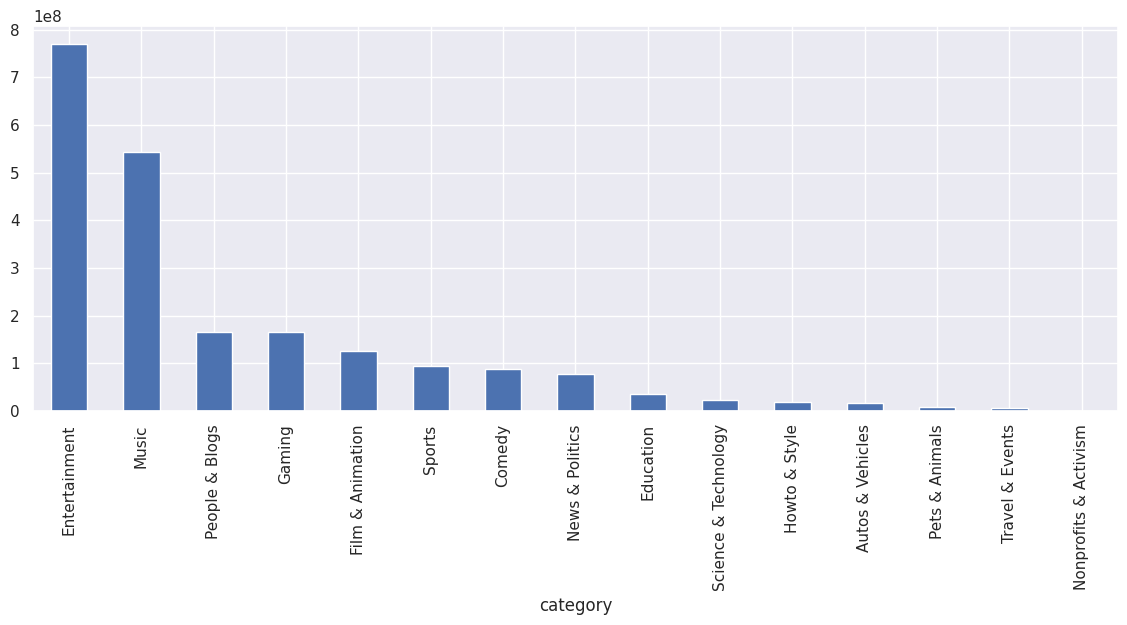

In [32]:
# calculating total likes for each category
plt.figure(figsize = [14,5])
combined_df.groupby('category')['view_count'].agg('sum').sort_values(ascending=False).plot(kind = 'bar')

<Axes: xlabel='category'>

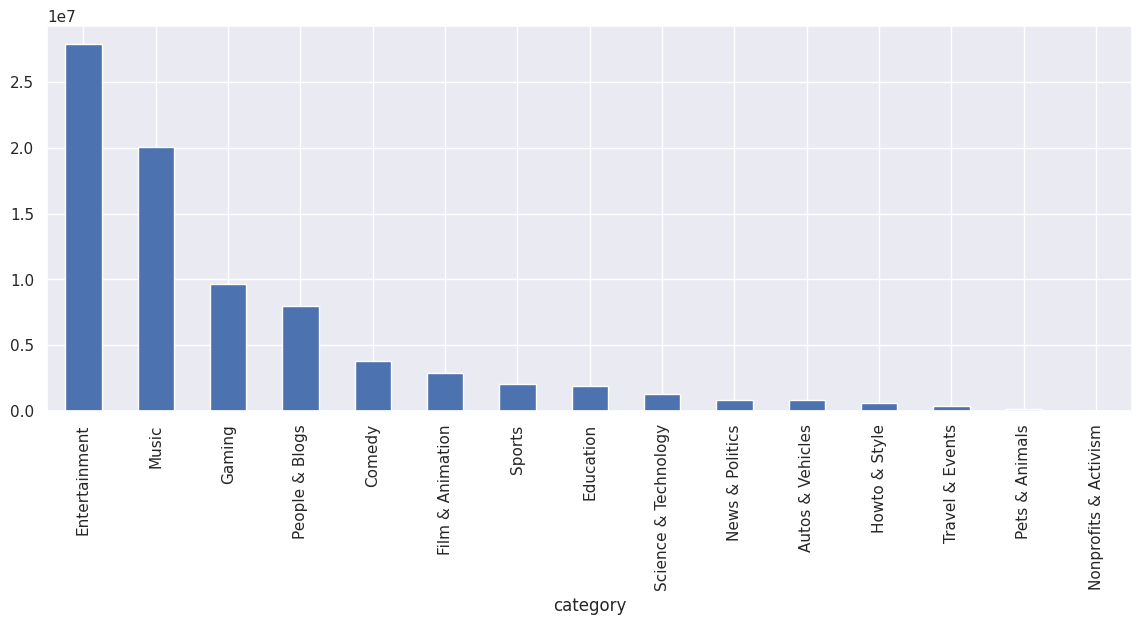

In [33]:
# calculating total likes for each category
plt.figure(figsize = [14,5])
combined_df.groupby('category')['likes'].agg('sum').sort_values(ascending=False).plot(kind = 'bar')

**Looks like Entertainment & Music has most view count as well as link count**

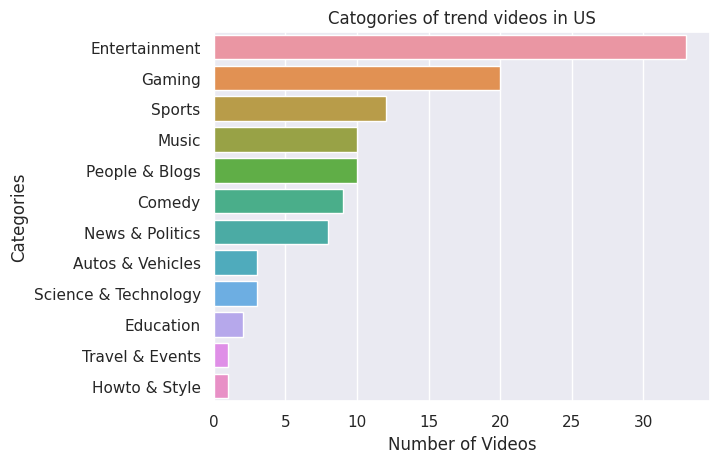

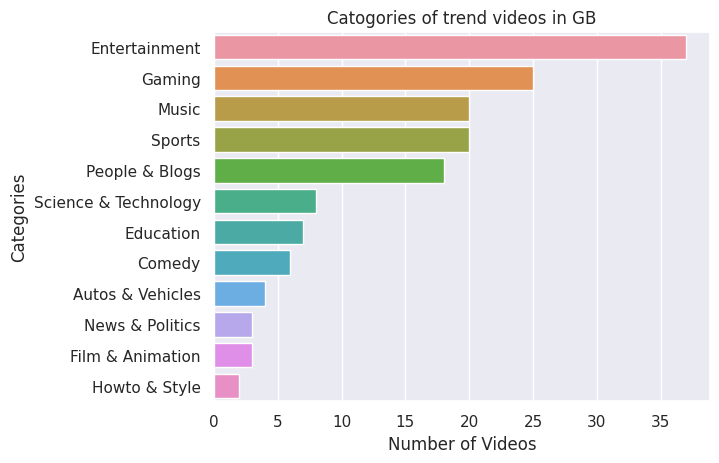

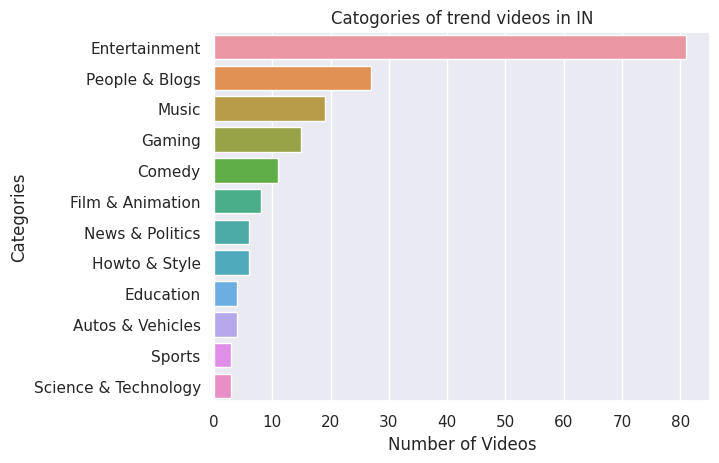

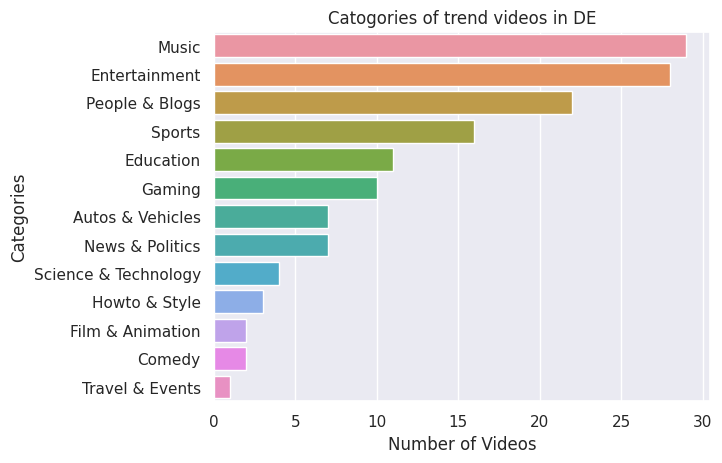

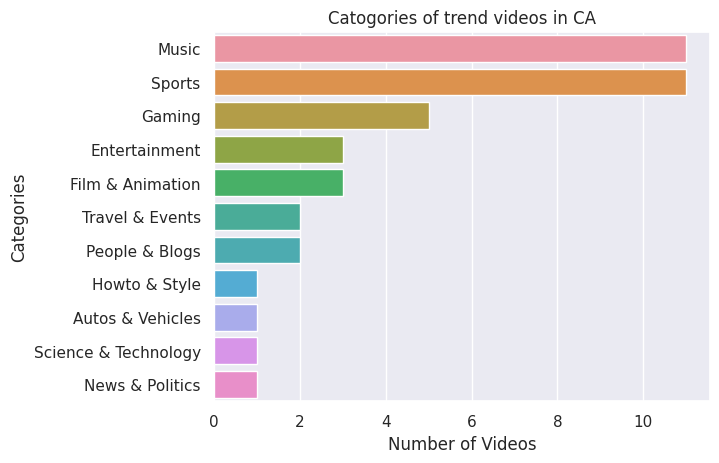

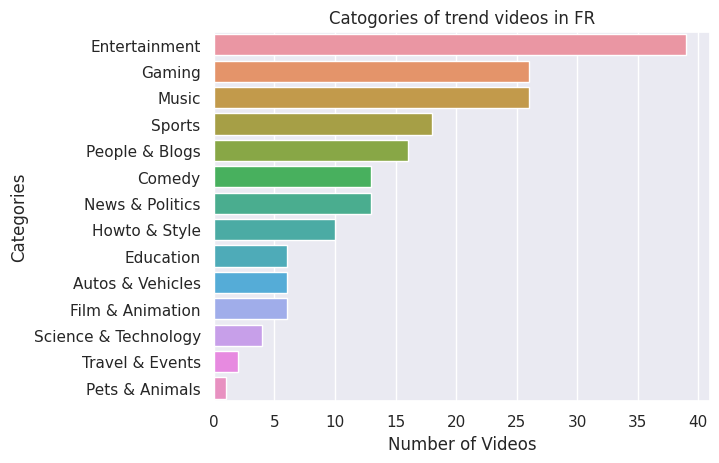

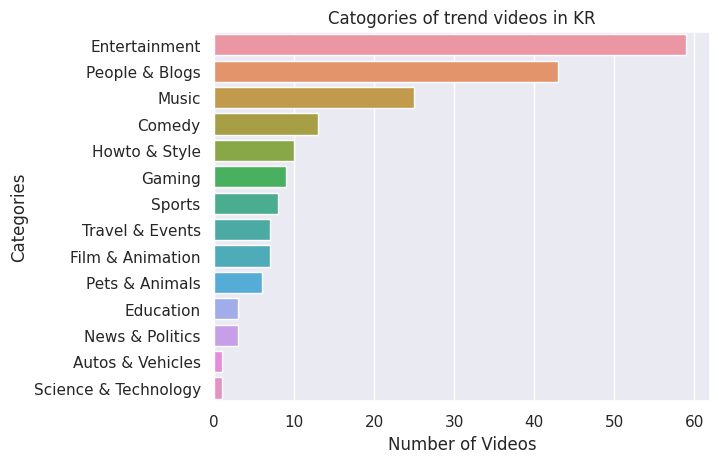

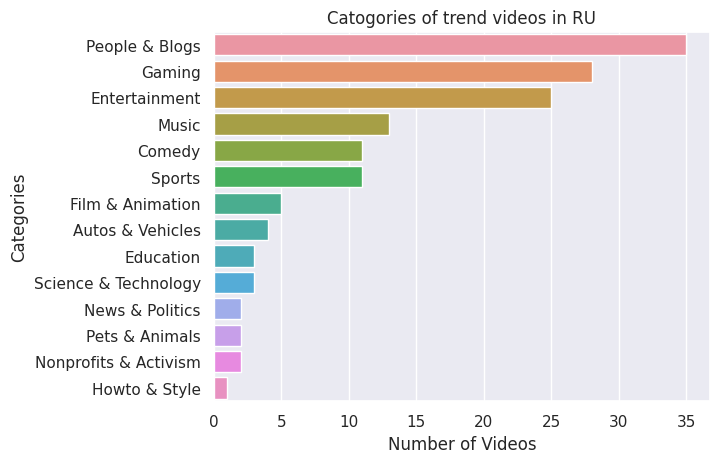

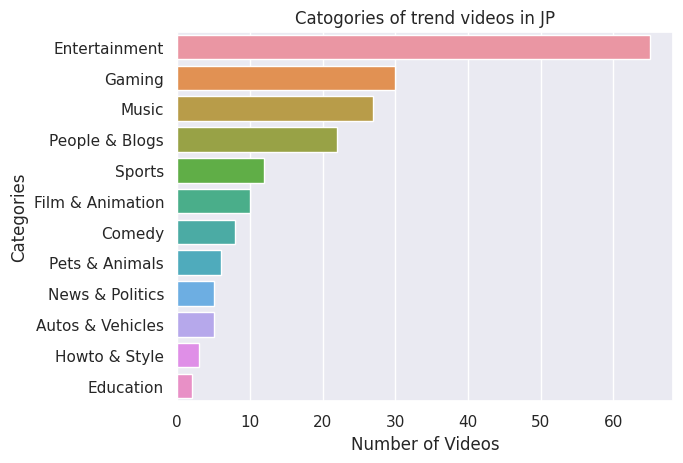

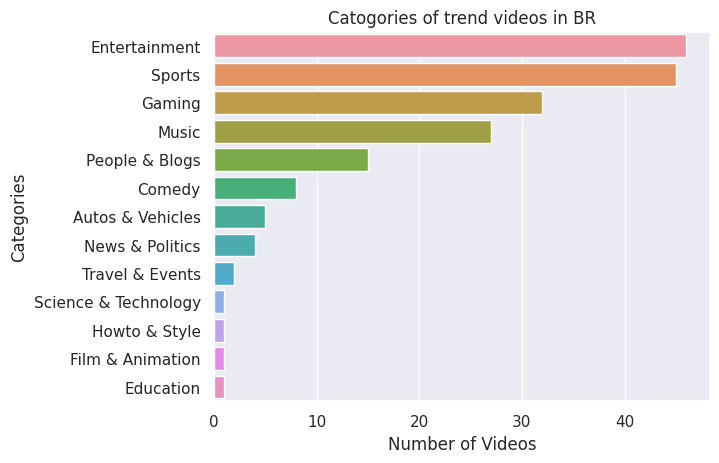

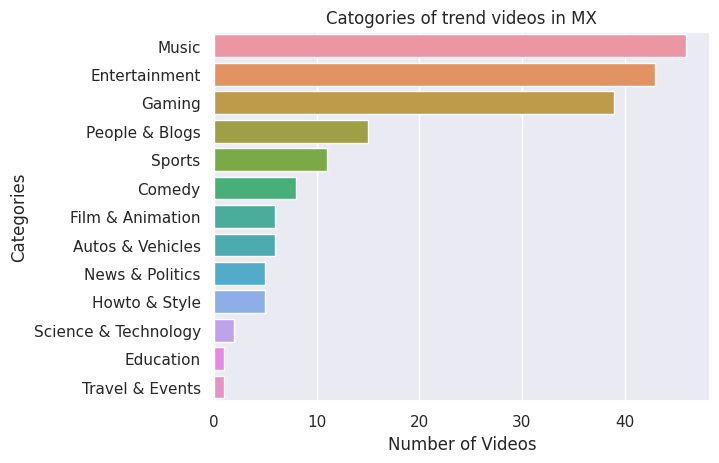

<Figure size 640x480 with 0 Axes>

In [34]:
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[9:11]
    countries.append(c)
for country in countries:
  tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
  ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
  plt.xlabel("Number of Videos")
  plt.ylabel("Categories")
  plt.title("Catogories of trend videos in " + country)
  plt.figure()



## Observation

1.   Apart from RU, category most liked by the users in each of the other countries is ‘Entertainment’.Viewers from RU prefer the category ‘People and Blogs’ the most.
2.   ‘How to Style’ & ‘Science & Technology’ were least liked Videos.
3.   Categories ‘Music’, ‘Gaming’, and ‘Entertainment’ were the most liked ones in almost all of the countries.   



Now, as we know the most preferred category from user in each country, we decided to see what were the top 5 videos on the trending page from each country.

In [35]:
#creating df of top 5 videos by view count by each country in different dataframes
tem = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['view_count'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    tem.append(temp[:][['country','category', 'view_count', 'likes','comment_count','publish_date','trending_date']]) #Getting only selected columns

In [36]:
#Combining it in one df
combined_temp = pd.concat(tem)
combined_temp.head(10)

,country,category,view_count,likes,comment_count,publish_date,trending_date
video_id,,,,,,,
48h57PspBec,US,Entertainment,142847672,4766997,129825,2023-06-10,2023-07-04
Wyb0ExKOE4w,US,Entertainment,43307434,1651496,170664,2023-06-07,2023-07-04
taRBVfDRukY,US,Music,41543741,457767,35364,2023-06-28,2023-07-04
5UaAZGteBPg,US,Entertainment,28087803,869220,90889,2023-07-02,2023-07-04
60npBvKvGBA,US,Entertainment,26209308,830454,96058,2023-06-28,2023-07-04
taRBVfDRukY,GB,Music,41543741,457767,35364,2023-06-28,2023-07-04
5UaAZGteBPg,GB,Entertainment,28087803,869220,90889,2023-07-02,2023-07-04
60npBvKvGBA,GB,Entertainment,26209308,830454,96058,2023-06-28,2023-07-04
oCxtsTU4BWg,GB,Music,21360222,1000594,42792,2023-06-30,2023-07-04


<Axes: >

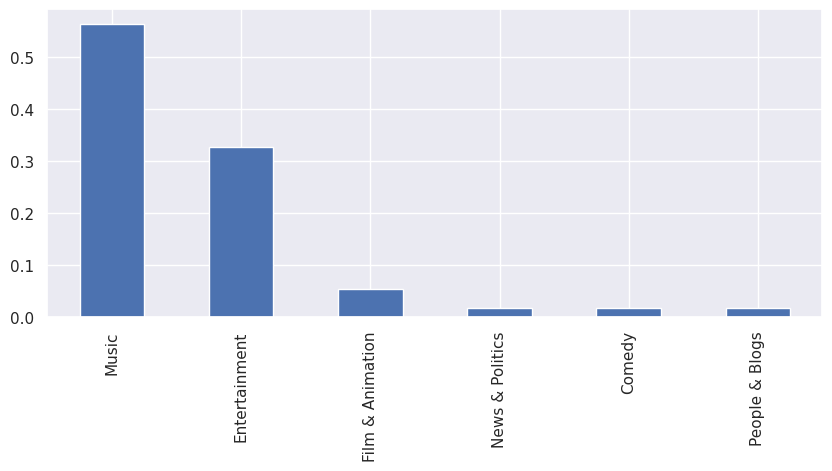

In [37]:
plt.figure(figsize = [10,4])
combined_temp.category.value_counts(normalize = True).plot(kind = 'bar')

As we can see most of the Videos are from Music & Entertainment categories only

In [38]:
#Lets find out average time to get the Video in the trending list
combined_temp['Avg_duration'] = combined_temp['trending_date'] - combined_temp['publish_date'] # Getting day difference
combined_temp['Avg_duration'] = combined_temp['Avg_duration'].astype('str') # Converting into string
combined_temp['Avg_duration'] = combined_temp['Avg_duration'].str.split(' ')
combined_temp['Avg_duration'] = combined_temp['Avg_duration'].apply(lambda x : int(x[0])) # Converting back into string
combined_temp

,country,category,view_count,likes,comment_count,publish_date,trending_date,Avg_duration
video_id,,,,,,,,
48h57PspBec,US,Entertainment,142847672,4766997,129825,2023-06-10,2023-07-04,24
Wyb0ExKOE4w,US,Entertainment,43307434,1651496,170664,2023-06-07,2023-07-04,27
taRBVfDRukY,US,Music,41543741,457767,35364,2023-06-28,2023-07-04,6
5UaAZGteBPg,US,Entertainment,28087803,869220,90889,2023-07-02,2023-07-04,2
60npBvKvGBA,US,Entertainment,26209308,830454,96058,2023-06-28,2023-07-04,6
taRBVfDRukY,GB,Music,41543741,457767,35364,2023-06-28,2023-07-04,6
5UaAZGteBPg,GB,Entertainment,28087803,869220,90889,2023-07-02,2023-07-04,2
60npBvKvGBA,GB,Entertainment,26209308,830454,96058,2023-06-28,2023-07-04,6
oCxtsTU4BWg,GB,Music,21360222,1000594,42792,2023-06-30,2023-07-04,4


<Axes: >

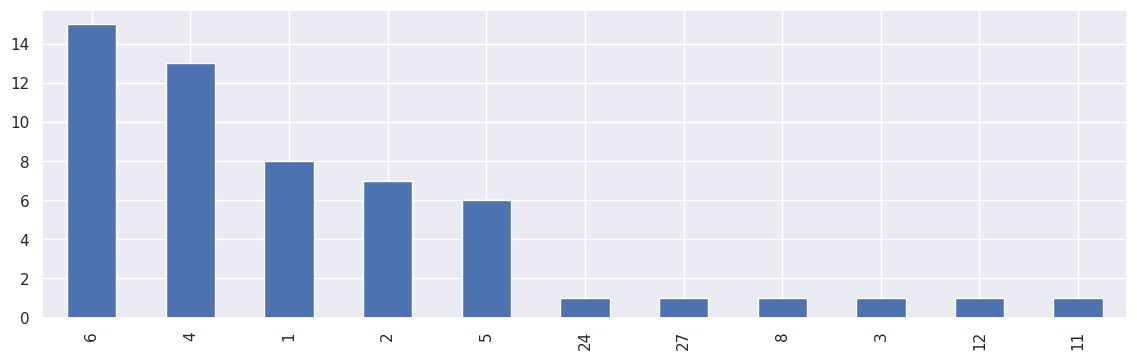

In [39]:
plt.figure(figsize = [14,4])
combined_temp.Avg_duration.value_counts().plot(kind = 'bar')

**On an average videos takes around 4 to 6 days to get viral**

<Axes: xlabel='category'>

<Figure size 1400x500 with 0 Axes>

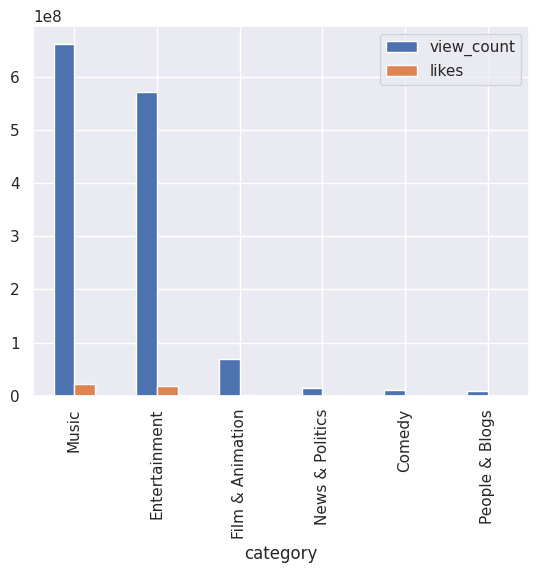

In [40]:
plt.figure(figsize = [14,5])
combined_temp.groupby(['category'])[['view_count','likes']].sum().sort_values(ascending = False , by ='view_count').plot(kind = 'bar')

**Music category has highest no of likes and view counts**

<Axes: xlabel='category'>

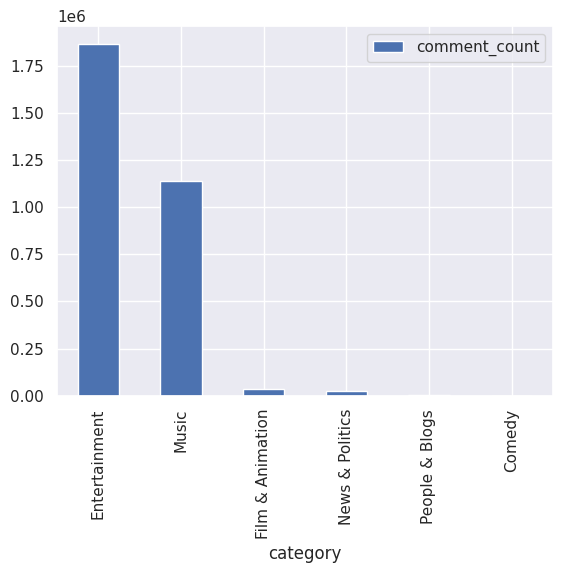

In [41]:
combined_temp.groupby(['category'])[['comment_count']].sum().sort_values(ascending = False , by ='comment_count').plot(kind = 'bar')

In [42]:
combined_temp.groupby(['country','category'])[['view_count','likes','comment_count']].sum()

view_count    likes  comment_count
country category                                            
BR      Entertainment       45145073  1448119         254011
        Music               57396319  2344251         112956
CA      Entertainment       18935765   617664         157966
        Music              121694958  4048179         185908
DE      Entertainment       28087803   869220          90889
        Film & Animation    18087934   173738           8960
        Music               57396319  2344246         112956
FR      Entertainment       28087803   869220          90889
        Film & Animation    18087934   173738           8960
        Music               57396319  2344249         112956
GB      Entertainment       54297111  1699674         186947
        Music               82234429  2510876         130244
IN      Entertainment       35749717   504352          16150
        Film & Animation    33442429   551478          15483
        Music               81004270  1995069          91028
        News & Politics     13681379   254551          27570
JP      Entertainment       18935765   617665         157966
        Music               36751744  1345710          90335
KR      Entertainment       18935765   617664         157966
        Music               64843665  1774477         105411
MX      Entertainment       75049285  2921500         266086
        Music               39836710  1795975          91091
RU      Comedy              10992232   143048            108
        Entertainment        6665966   157869            611
        Music               21860134   917796          68406
        People & Blogs       8564915   362698           2475
US      Entertainment      240452217  8118167         487436
        Music               41543741   457767          35364

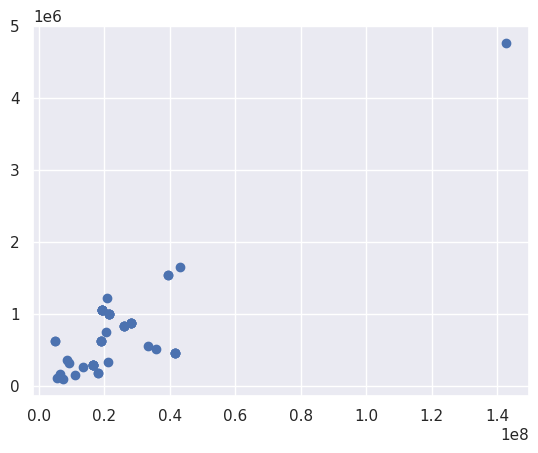

In [43]:
#Let's find out linear relationship between Likes & View count
plt.scatter(x = 'view_count', y = 'likes', data = combined_temp)

In [44]:
heat = combined_temp[['view_count','likes','Avg_duration','comment_count']].corr()
heat

,view_count,likes,Avg_duration,comment_count
view_count,1.000000,0.835385,0.652628,0.335678
likes,0.835385,1.000000,0.642520,0.466190
Avg_duration,0.652628,0.642520,1.000000,0.475514
comment_count,0.335678,0.466190,0.475514,1.000000


<Axes: >

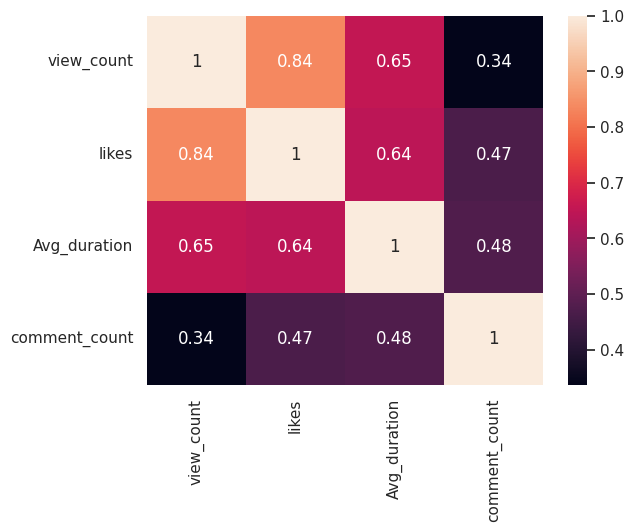

In [45]:
sns.heatmap(data = heat , annot = True)

In [51]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

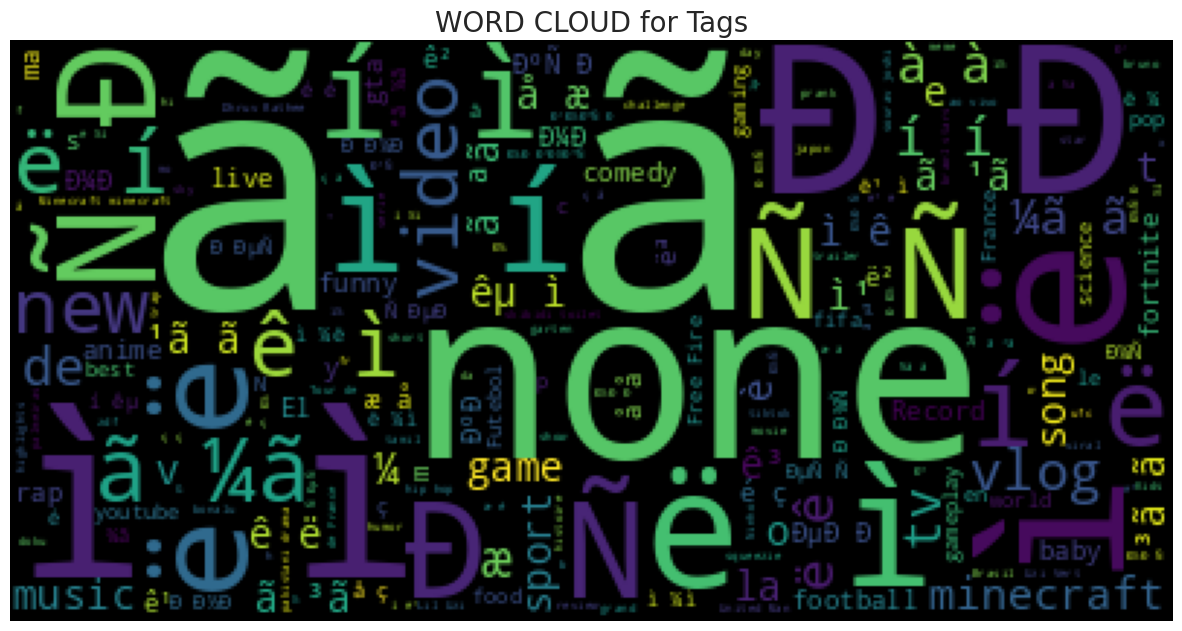

In [53]:
plt.figure(figsize = (15, 15))
#stopwords = set(STOPWORDS)
wordcloud = WordCloud(
background_color = 'black',
#stopwords = stopwords,
max_words = 1000,
max_font_size = 120,
random_state = 42
).generate(str(combined_df['tags']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Tags', fontsize = 20)
plt.axis('off')
plt.show()